In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
jax.config.update("jax_enable_x64", True)

In [67]:
# load the traces
def load_data(file_name: str):
    data = jnp.load(file_name)
    trace = data["trace"] # shape (n_steps, n_state_vars)
    grad = data["grad"] # shape (n_steps, n_state_vars)
    hessian = data["hessian"] # shape (n_steps, n_state_vars, n_state_vars)
    energy = data["energy"] # shape (n_steps,)
    return trace, grad, hessian, energy

In [68]:
def heatmap(data, title=None, xlabel=None, ylabel=None, cyclic_color=False, center_zero=False):

    if cyclic_color:
        cmap = plt.cm.twilight
        color_range = (0, 2)
    elif center_zero:
        cmap = plt.cm.bwr
        max_abs_val = jnp.max(jnp.abs(data))
        color_range = (-max_abs_val, max_abs_val)
    else:
        cmap = plt.cm.viridis
        color_range = (jnp.min(data), jnp.max(data))

    plt.imshow(data, aspect='auto', cmap=cmap, interpolation='nearest', vmin=color_range[0], vmax=color_range[1])
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
        
    plt.colorbar()
    plt.show()

In [83]:
def visualize_energy_landscape(data_file: str):
    trace, grad, hessian, energy = load_data(data_file)
    
    # Visualize the trace of states
    heatmap(trace.T % 2, title="θ", xlabel="Time Steps", ylabel="State Variables", cyclic_color=True)
    
    # Visualize the gradient of energy
    heatmap(grad.T, title="dθ/dt ~ -∂E/∂θ", xlabel="Time Steps", ylabel="State Variables", center_zero=True)
    
    # Analyze the final Hessian matrix
    eig_values = jnp.array([jnp.linalg.eigvalsh(-hess) for hess in hessian])
    heatmap(eig_values.T, title="Eigenvalues of the Hessian (∂²E/∂θ²)", xlabel="Time Steps", ylabel="Eigenvalue Index", center_zero=True)

    cond_number = jnp.array([jnp.linalg.cond(-hess) for hess in hessian])
    plt.figure(figsize=(6, 3))
    plt.plot(cond_number)
    plt.title("Condition Number of Hessian Over Time")
    plt.xlabel("Time Steps")
    plt.ylabel("Condition Number")
    plt.grid(True)
    plt.show()

    # plot avg, min, max abs(grad) over time
    avg_grad = jnp.mean(jnp.abs(grad), axis=1)
    min_grad = jnp.min(jnp.abs(grad), axis=1)
    max_grad = jnp.max(jnp.abs(grad), axis=1)
    plt.figure(figsize=(6, 3))
    plt.plot(avg_grad, label='Avg.')
    plt.plot(min_grad, label='Min.')
    plt.plot(max_grad, label='Max.')
    plt.title("Gradient of Energy Over Time")
    plt.xlabel("Time Steps")
    plt.ylabel("|dθ/dt|")
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

    # plot energy over time
    plt.figure(figsize=(6, 3))
    plt.plot(energy)
    plt.title("Energy Over Time")
    plt.xlabel("Time Steps")
    plt.ylabel("Energy")
    plt.grid(True)
    plt.show()

    

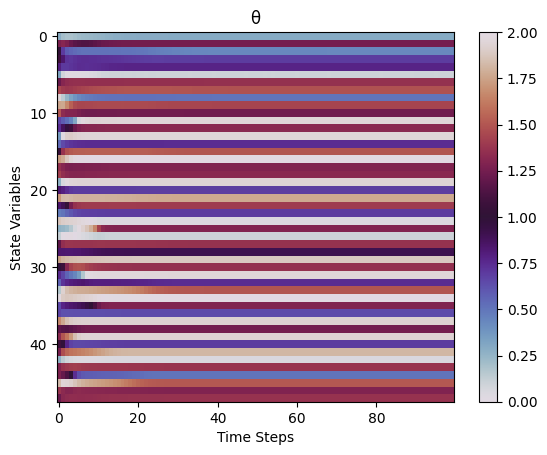

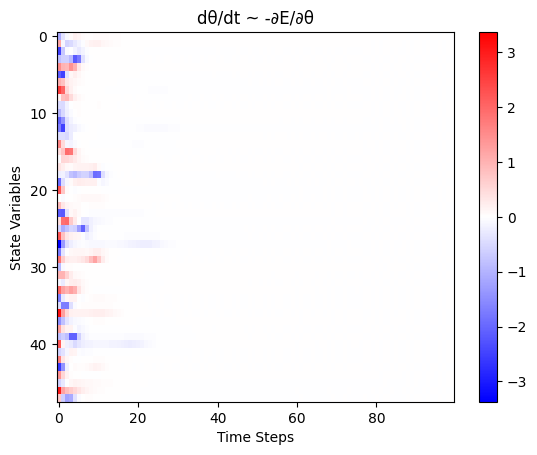

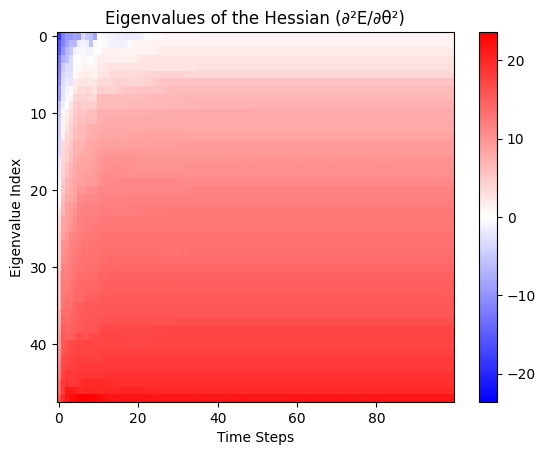

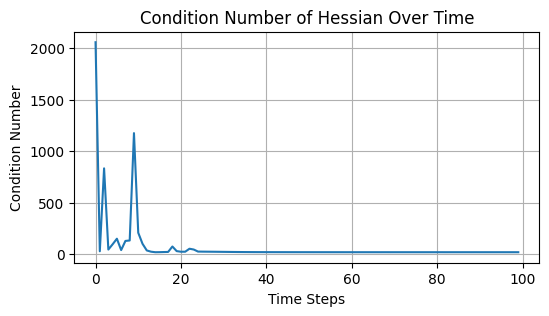

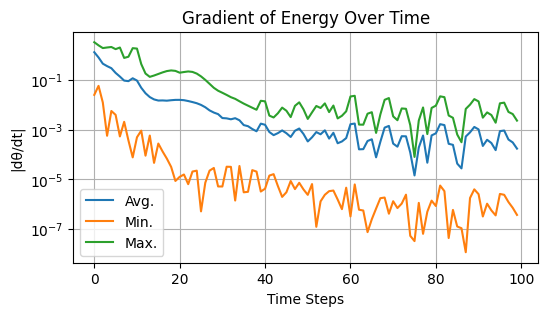

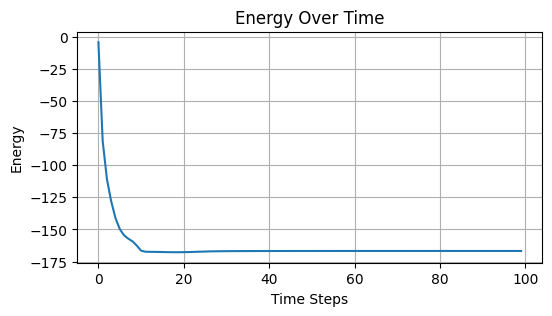

In [87]:
visualize_energy_landscape("trace_grad_hessian.npz")

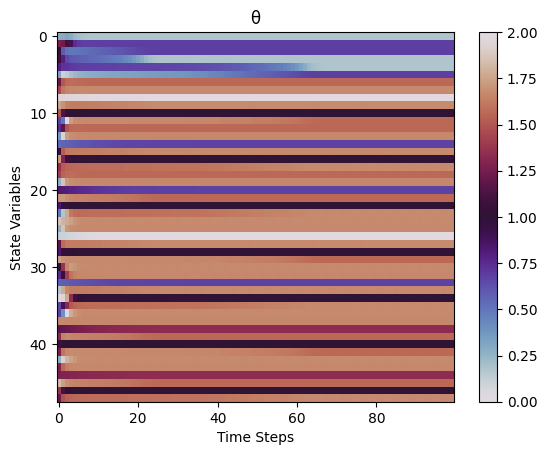

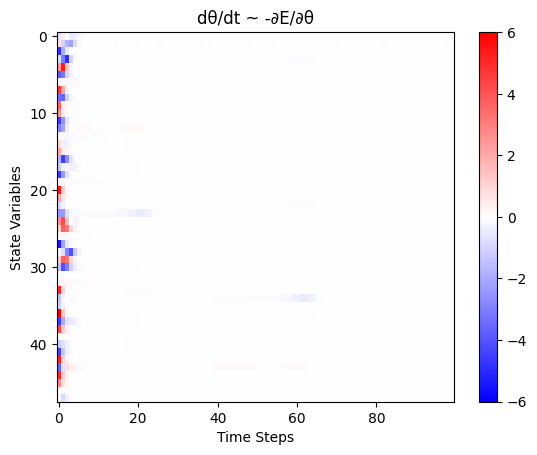

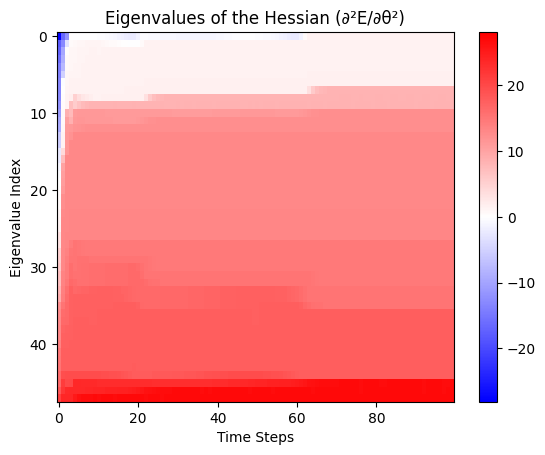

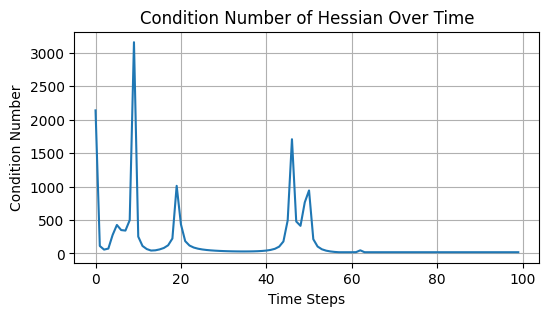

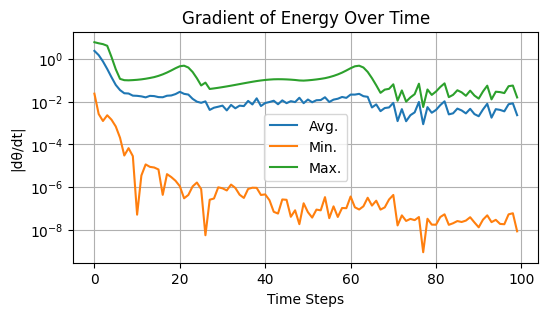

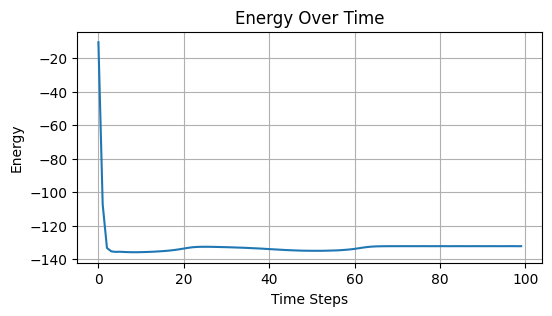

In [86]:
visualize_energy_landscape("trace_grad_hessian_trained.npz")